## Ultimate challange 

In [6]:
#importing necessary libararies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
login_df=pd.read_json("C:/Users/Admin/Desktop/take home challange/1481053515_ultimate_challenge/ultimate_challenge/logins.json")

In [8]:
login_df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [9]:
login_df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [10]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 93142 entries, 0 to 93141
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   login_time  93142 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 727.8 KB


In [11]:
type(login_df['login_time'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [12]:
login_df["login_time"].min() #checking the first instance of login by customer

Timestamp('1970-01-01 20:12:16')

In [13]:
login_df["login_time"].max() # checking the latest instance of login by customer

Timestamp('1970-04-13 18:57:38')

So now we have first and latest instance of login by customer.

Now we can make a timestamp of 15 mins.

In [14]:
login_df = login_df.set_index('login_time') # Rsetting the index to long_time

In [15]:
login_df.head()

""
login_time
1970-01-01 20:13:18
1970-01-01 20:16:10
1970-01-01 20:16:37
1970-01-01 20:16:36
1970-01-01 20:26:21


In [16]:
# aggregate login counts based on 15-minute time intervals
login_df['count_fifteenMin'] = 0
login_df = login_df.resample('15min').count()
login_df.head()

,count_fifteenMin
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [17]:
login_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   count_fifteenMin  9788 non-null   int64
dtypes: int64(1)
memory usage: 152.9 KB


In [18]:
login=login_df.reset_index()

In [19]:
login.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   login_time        9788 non-null   datetime64[ns]
 1   count_fifteenMin  9788 non-null   int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.1 KB


In [20]:
login.head()

,login_time,count_fifteenMin
0,1970-01-01 20:00:00,2
1,1970-01-01 20:15:00,6
2,1970-01-01 20:30:00,9
3,1970-01-01 20:45:00,7
4,1970-01-01 21:00:00,1


# Part 1 ‑ Exploratory data analysis

The attached logins.json file contains (simulated) timestamps of user logins in a particular
geographic location. Aggregate these login counts based on 15­minute time intervals, and
visualize and describe the resulting time series of login counts in ways that best characterize the
underlying patterns of the demand. Please report/illustrate important features of the demand,
such as daily cycles. If there are data quality issues, please report them.

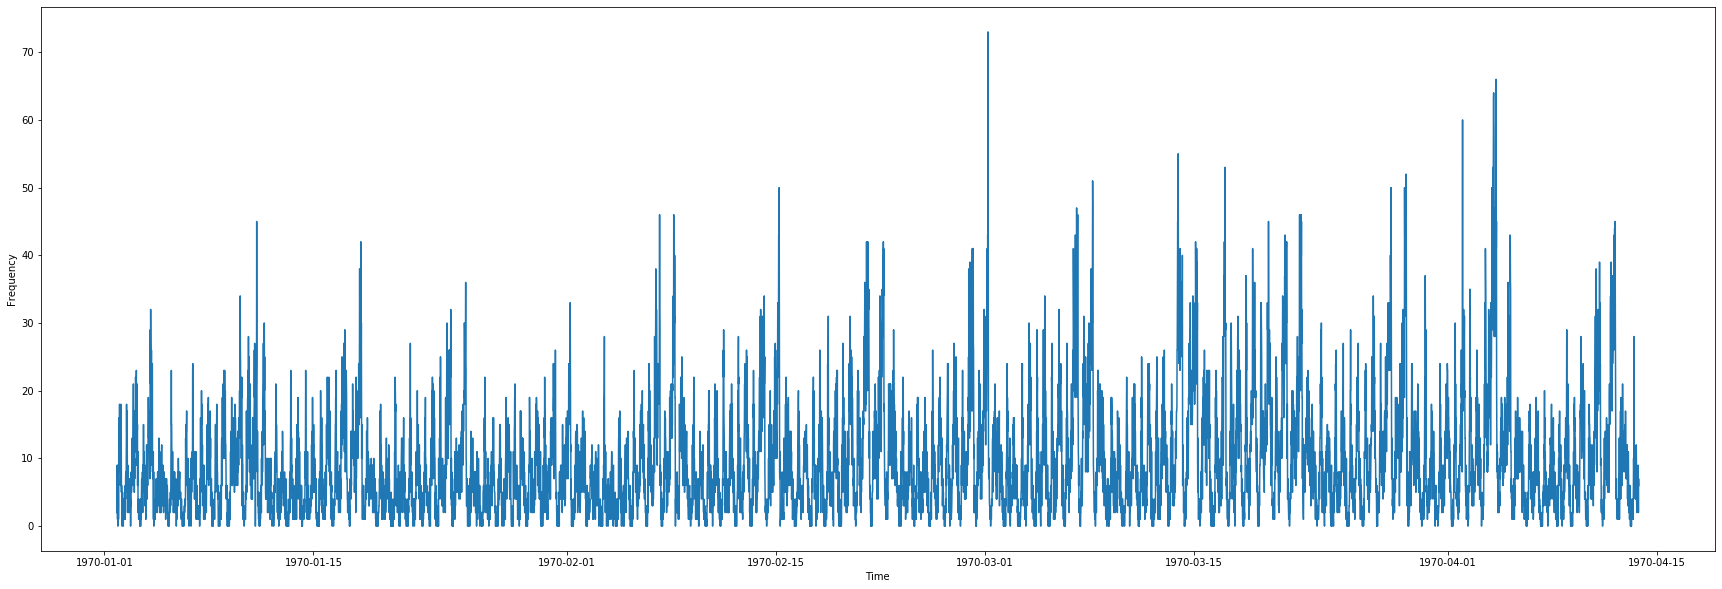

In [21]:
#plotting the number of login_time per 15 min
plt.figure(figsize=(30,10))
plt.plot(login["login_time"],login["count_fifteenMin"])
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.show()

In [22]:
# Managing warnings
import  warnings
warnings.simplefilter('ignore')

In [23]:
# plotting seasonal data

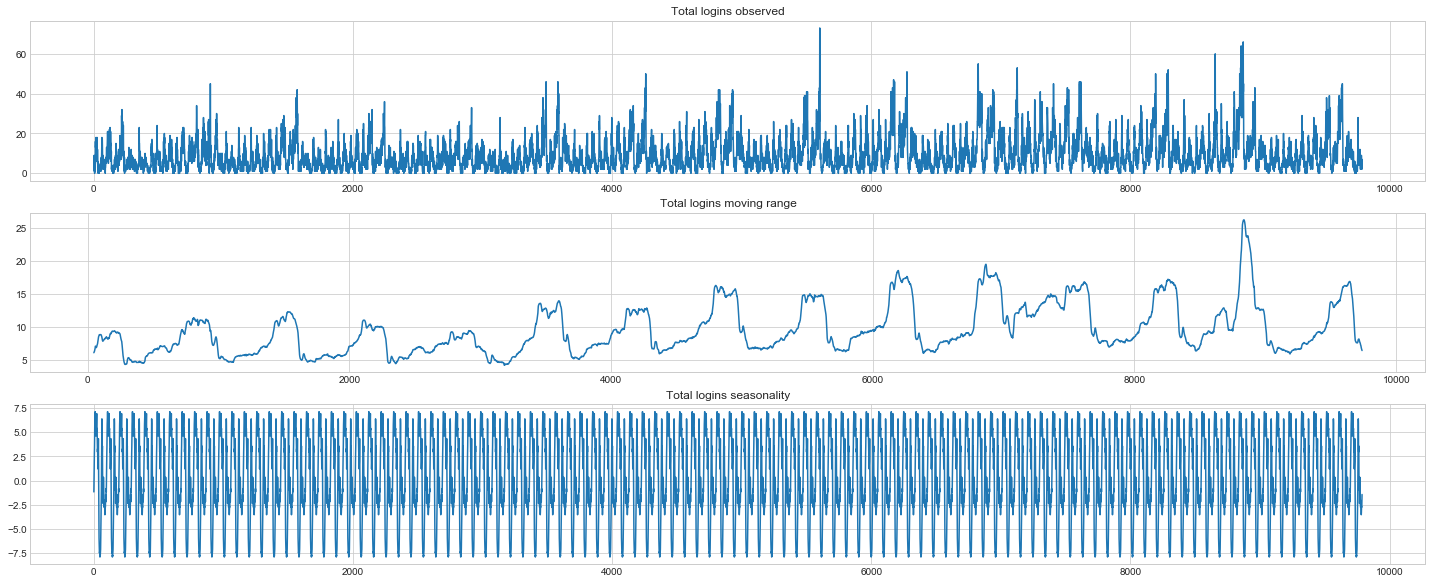

In [24]:
from statsmodels.tsa.seasonal import seasonal_decompose

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 
season = seasonal_decompose(login["count_fifteenMin"], model='additive', freq=96)

plt.subplot(3, 1, 1)
plt.title('Total logins observed')
season.observed.plot()

plt.subplot(3, 1, 2)
plt.title('Total logins moving range')
season.trend.plot()

plt.subplot(3, 1, 3)
plt.title('Total logins seasonality')
season.seasonal.plot()

In [25]:
# some trenda are visible but more analysis is needed

In [26]:
# weekly analusis

In [27]:
login['weekday']=login['login_time'].dt.day_name() #weekday = dayofweek (alias)
login.head()

,login_time,count_fifteenMin,weekday
0,1970-01-01 20:00:00,2,Thursday
1,1970-01-01 20:15:00,6,Thursday
2,1970-01-01 20:30:00,9,Thursday
3,1970-01-01 20:45:00,7,Thursday
4,1970-01-01 21:00:00,1,Thursday


In [28]:
df_dayweek = login.groupby('weekday', as_index=False).sum()
df_dayweek

,weekday,count_fifteenMin
0,Friday,15208
1,Monday,8823
2,Saturday,19377
3,Sunday,18167
4,Thursday,11960
5,Tuesday,9268
6,Wednesday,10339


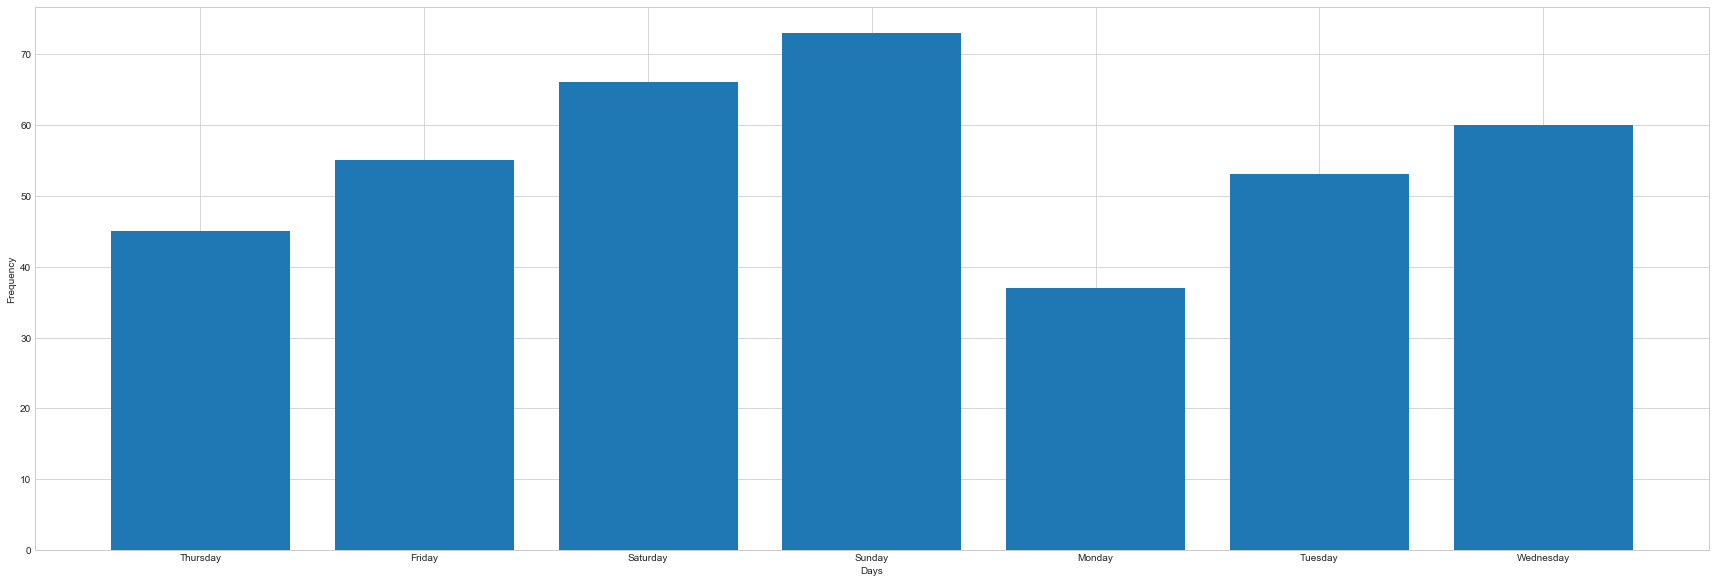

In [29]:
plt.figure(figsize=(30,10))
plt.bar(login["weekday"],login["count_fifteenMin"])
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

In [30]:
# so we can see that login increases gradually from monday and is higest in sunday

In [31]:
# hourly analysis

In [32]:
login['hour'] = login['login_time'].dt.hour
login.head()

,login_time,count_fifteenMin,weekday,hour
0,1970-01-01 20:00:00,2,Thursday,20
1,1970-01-01 20:15:00,6,Thursday,20
2,1970-01-01 20:30:00,9,Thursday,20
3,1970-01-01 20:45:00,7,Thursday,20
4,1970-01-01 21:00:00,1,Thursday,21


In [33]:
df_hour = login.groupby('hour', as_index=False).sum()
df_hour.head()

,hour,count_fifteenMin
0,0,5993
1,1,6317
2,2,5800
3,3,4831
4,4,5034


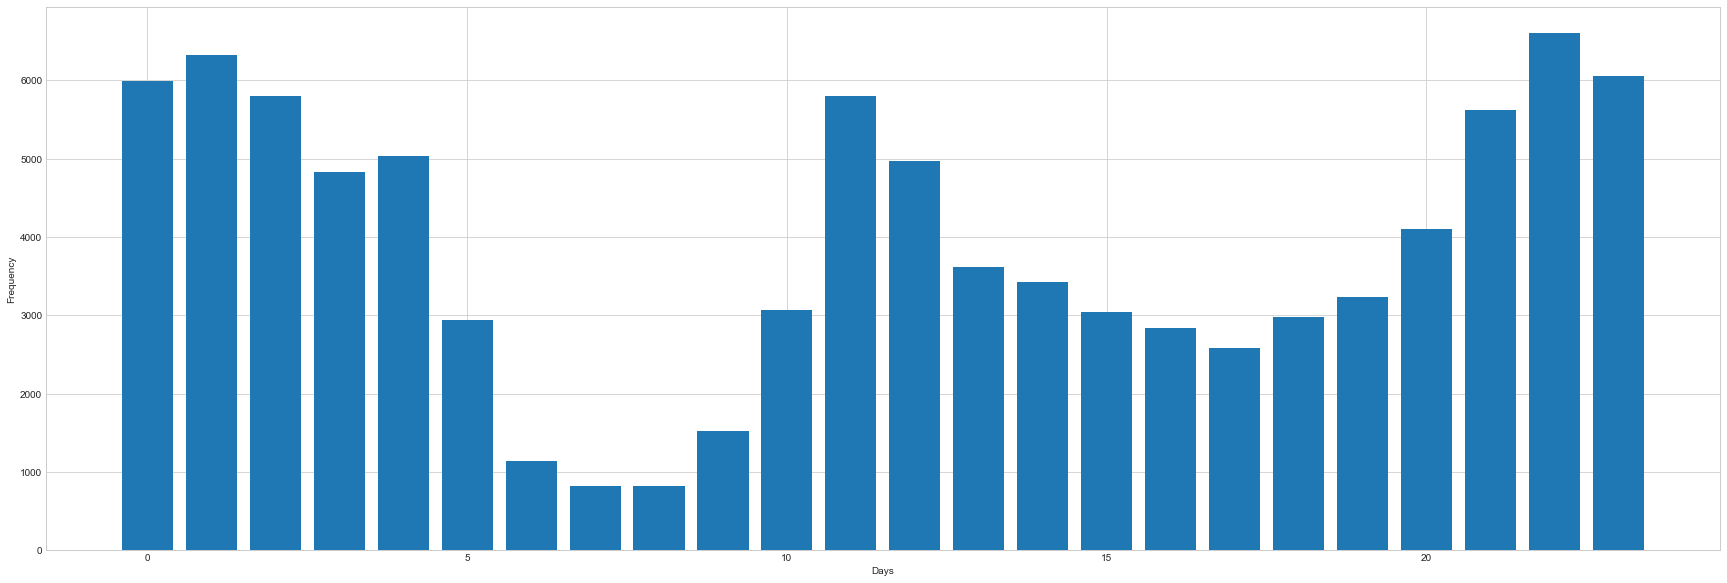

In [34]:
plt.figure(figsize=(30,10))
plt.bar(df_hour["hour"],df_hour["count_fifteenMin"])
plt.xlabel("Days")
plt.ylabel("Frequency")
plt.show()

In [35]:
# hourly analysis day wise

In [36]:
df_day_hour = login.groupby(['weekday','hour'], as_index=False).sum()
df_day_hour.head()

,weekday,hour,count_fifteenMin
0,Friday,0,975
1,Friday,1,957
2,Friday,2,771
3,Friday,3,502
4,Friday,4,353


<Figure size 2016x1008 with 0 Axes>

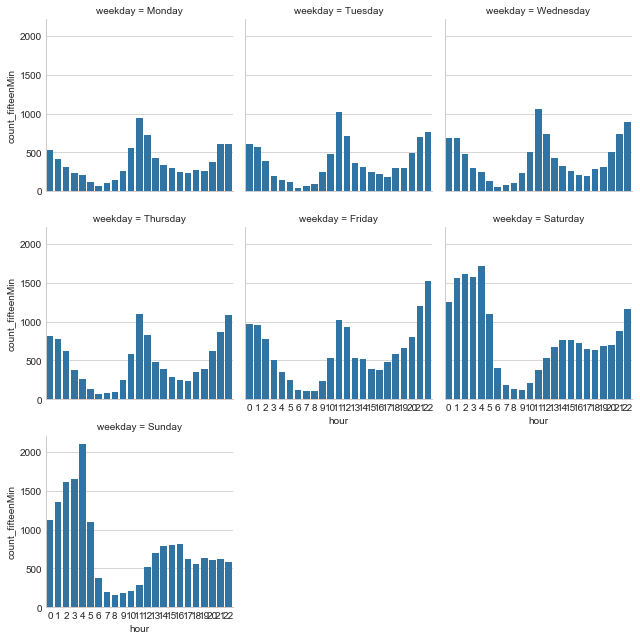

In [37]:
fig = plt.figure(figsize=(28,14))
weekday_order=["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"]
g = sns.FacetGrid(df_day_hour, col="weekday", col_wrap=3, col_order=weekday_order)
g.map(sns.barplot, "hour", "count_fifteenMin", order=range(0,23))

## Findings

We can see that login increases gradually from Monday to Sunday

And the houly login for each day follows a patter

## Suggestion

To increases the login rate provide a feasible offers during less login hours 

# Part 2 ‑ Experiment and metrics design


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on
weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active
during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend
to be exclusive to each city. The Ultimate managers of city operations for the two cities have
proposed an experiment to encourage driver partners to be available in both cities, by
reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in
encouraging driver partners to serve both cities, and why would you choose this metric?


We would like to see if revenue increases or not

2. Describe a practical experiment you would design to compare the effectiveness of the
proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment

We would take 30 % of drives and see if the revenue increases or not

b. what statistical test(s) you will conduct to verify the significance of the
observation

we would perform A/b test 

c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

if revenue increases we would implement the process




# Part 3 ‑ Predictive modeling

Ultimate is interested in predicting rider retention. To help explore this question, we have
provided a sample dataset of a cohort of users who signed up for an Ultimate account in
January 2014. The data was pulled several months later; we consider a user retained if they
were “active” (i.e. took a trip) in the preceding 30 days.
We would like you to use this data set to help understand what factors are the best predictors
for retention, and offer suggestions to operationalize those insights to help Ultimate.
The data is in the attached file ultimate_data_challenge.json. See below for a detailed
description of the dataset. Please include any code you wrote for the analysis and delete the
dataset when you have finished with the challenge.
1. Perform any cleaning, exploratory analysis, and/or visualizations to use the provided
data for this analysis (a few sentences/plots describing your approach will suffice). What
fraction of the observed users were retained?
2. Build a predictive model to help Ultimate determine whether or not a user will be active
in their 6th month on the system. Discuss why you chose your approach, what
alternatives you considered, and any concerns you have. How valid is your model?
Include any key indicators of model performance.
3. Briefly discuss how Ultimate might leverage the insights gained from the model to
improve its long­term rider retention (again, a few sentences will suffice).


In [41]:
# reading another file 
df=pd.read_json("C:/Users/Admin/Desktop/take home challange/1481053515_ultimate_challenge/ultimate_challenge/ultimate_data_challenge.json")

In [42]:
df.head(10)

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9
5,Winterfell,2,2014-01-09,3.5,1.00,2014-06-06,iPhone,0.0,True,100.0,10.56,5.0
6,Astapor,1,2014-01-24,NaN,1.00,2014-01-25,Android,0.0,False,100.0,3.95,4.0
7,Winterfell,2,2014-01-28,5.0,1.00,2014-01-29,iPhone,0.0,False,100.0,2.04,5.0
8,Winterfell,2,2014-01-21,4.5,1.00,2014-02-01,Android,0.0,False,100.0,4.36,5.0
9,Winterfell,1,2014-01-03,NaN,1.00,2014-01-05,Android,0.0,False,0.0,2.37,5.0


The details of the columns

● city: city this user signed up in

● phone: primary device for this user

● signup_date: date of account registration; in the form ‘YYYYMMDD’

● last_trip_date: the last time this user completed a trip; in the form ‘YYYYMMDD’

● avg_dist: the average distance in miles per trip taken in the first 30 days after signup

● avg_rating_by_driver: the rider’s average rating over all of their trips

● avg_rating_of_driver: the rider’s average rating of their drivers over all of their trips

● surge_pct: the percent of trips taken with surge multiplier > 1

● avg_surge: The average surge multiplier over all of this user’s trips

● trips_in_first_30_days: the number of trips this user took in the first 30 days after
signing up

● ultimate_black_user: TRUE if the user took an Ultimate Black in their first 30 days;
FALSE otherwise

● weekday_pct: the percent of the user’s trips occurring during a weekday

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [44]:
# check nulls : get index of null values and get dataframe
df[df['avg_rating_of_driver'].isnull()].head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
6,Astapor,1,2014-01-24,NaN,1.0,2014-01-25,Android,0.0,False,100.0,3.95,4.0
9,Winterfell,1,2014-01-03,NaN,1.0,2014-01-05,Android,0.0,False,0.0,2.37,5.0
12,Winterfell,1,2014-01-15,NaN,1.0,2014-03-12,iPhone,0.0,False,100.0,20.29,5.0
14,Astapor,1,2014-01-27,NaN,1.0,2014-01-28,Android,0.0,False,100.0,26.01,5.0
15,Winterfell,1,2014-01-15,NaN,1.0,2014-01-16,Android,0.0,True,100.0,13.20,5.0


In [45]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [46]:
# filling null values with mean
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean()) #4.6
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].round(1)

df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean()) #4.8
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].round(1)

In [47]:
#filling null for categorical values
df['phone'] = df['phone'].fillna(df['phone'].mode().iloc[0]) #fill missing values for each column (using its own most frequent value)

In [48]:
# changing coloums to datetime
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] =  pd.to_datetime(df['last_trip_date'])

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

In [50]:
# defing active users
# active users are defined as if the user has taken a trip in the last 30 days

earliest_signup = df.signup_date.min()
latest_signup = df.signup_date.max()
signups_ct = df.signup_date.count()
last_trip = df.last_trip_date.max()

print('There were {} signups between {} and {}'.format(signups_ct, earliest_signup, latest_signup))
print('Last trip: {}'.format(last_trip))

There were 50000 signups between 2014-01-01 00:00:00 and 2014-01-31 00:00:00
Last trip: 2014-07-01 00:00:00


In [52]:
#this sequence runs through the dataframe, creates a date six months from the start date, and then checks if the last trip falls
#within a 30 days of that time. Then it ouputs a 1 or 0 to a list of active users.

active_users = []
for i in range(len(df)):
    st = pd.Timestamp(df['signup_date'][i]) #get start date
    et = st + pd.Timedelta('181D') #6 months later
    at = et - pd.Timedelta('30D') #set point 30 days prior
    if at <= pd.Timestamp(df['last_trip_date'][i]) <= et:
        active_users.append(1) # now that the active condition has been met, set active user to 1
    else:
        active_users.append(0)

In [53]:
type(active_users)

list

In [54]:
len(active_users)

50000

In [55]:
df["active"]=active_users # adding the array to a new column called "rating_avg"
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    50000 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   50000 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    50000 non-null  float64       
 12  active                  50000 non-null  int64 

In [57]:
df['signup_date'] = pd.to_datetime(df['signup_date'])
df['last_trip_date'] =  pd.to_datetime(df['last_trip_date'])

In [58]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==np.object
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()
categorical_cols


['city', 'phone']

In [59]:
#integer
int_feature_mask = df.dtypes==np.int64
int_cols = df.columns[int_feature_mask].tolist()
int_cols

['trips_in_first_30_days', 'active']

In [60]:
numeric_feature_mask = df.dtypes==np.number
numeric_cols = df.columns[numeric_feature_mask].tolist()
comb_numeric_cols = numeric_cols + int_cols
comb_numeric_cols

['avg_rating_of_driver',
 'avg_surge',
 'surge_pct',
 'weekday_pct',
 'avg_dist',
 'avg_rating_by_driver',
 'trips_in_first_30_days',
 'active']

In [61]:
bool_feature_mask = df.dtypes==np.bool
bool_cols = df.columns[bool_feature_mask].tolist()
bool_cols

['ultimate_black_user']

In [62]:
# drop time columns
time_cols = ['last_trip_date', 'signup_date']
df = df.drop(time_cols, axis=1)

In [63]:
def boolToint(x):
    if(x==True):
        return 1
    elif(x==False):
        return 0
    return "error"

df['ultimate_black_user'] = [1 if x == True else 0 for x in df.ultimate_black_user]

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  int64  
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  active                  50000 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 4.2+ MB


RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

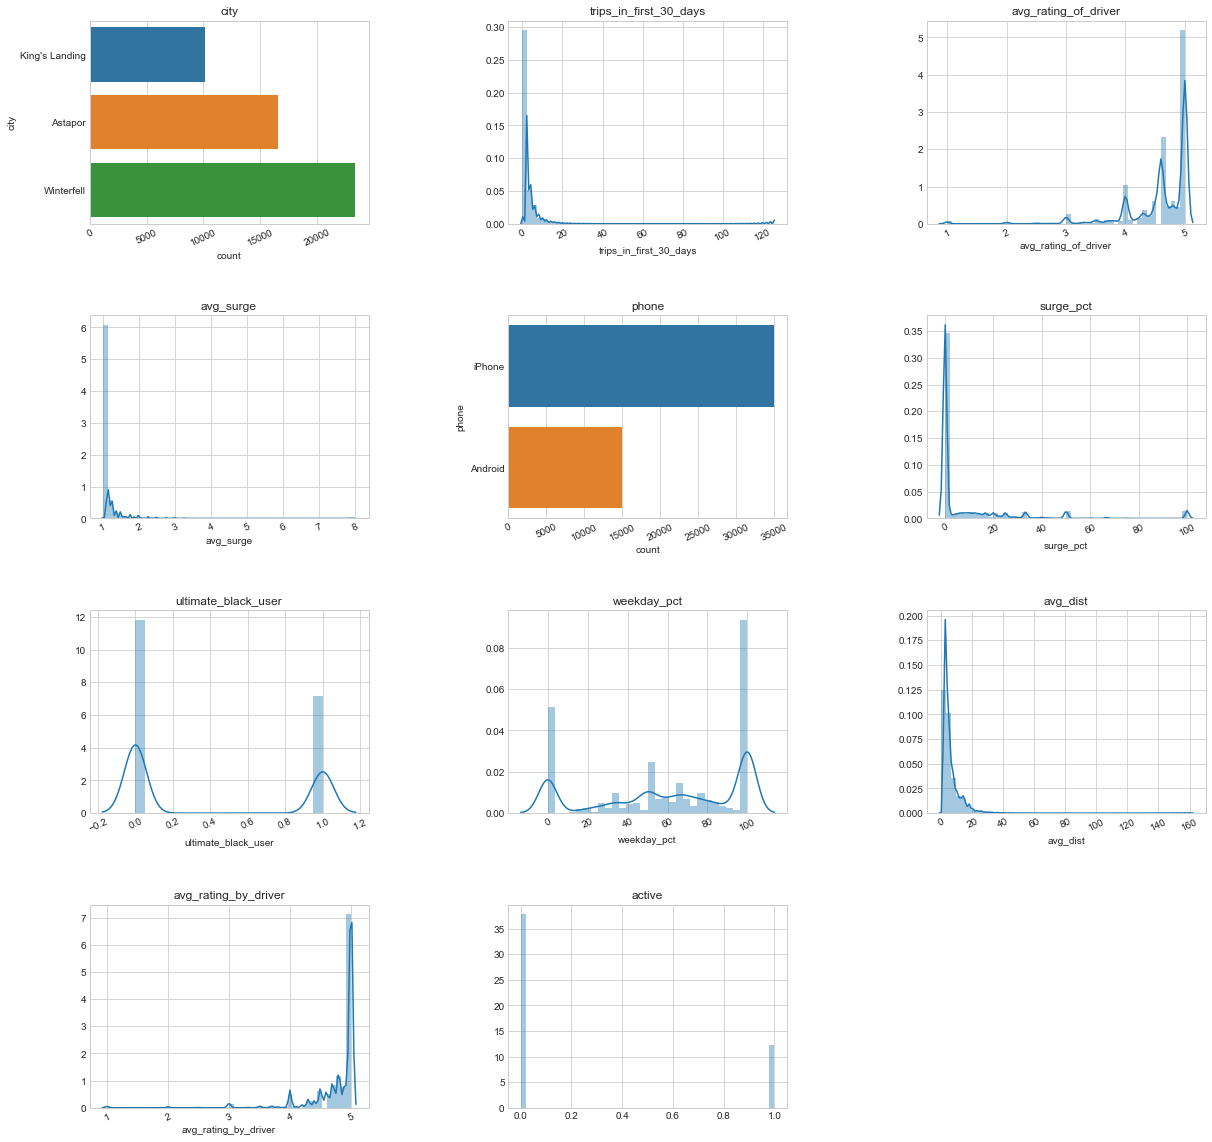

In [65]:
import math
# Let’s plot the distribution of each feature for plot_distribution
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object: #Categorical
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else: #Numerical
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)
    
plot_distribution(df, cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

In [ ]:
# categorical bi-variate analysis
plt.style.use('seaborn-whitegrid')

for cat in categorical_cols:
    fig = plt.figure(figsize=(20,4)) 
    sns.countplot(y=cat, hue="active", data=df)

In [ ]:
for cat in categorical_cols:
    for num in comb_numeric_cols:
        g = sns.FacetGrid(df, col=cat,height=4, aspect=.7, 
                          col_order=df[cat].value_counts().index, row_order=num)
        g = g.map(sns.boxplot, 'active', num)

In [ ]:
# two variables
fig = plt.figure(figsize=(5,2)) 
sns.barplot(x='phone', y='avg_dist', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(y='avg_dist', x='ultimate_black_user', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(x='phone', y='weekday_pct', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(y='weekday_pct', x='ultimate_black_user', data=df)

fig = plt.figure(figsize=(5,2)) 
sns.barplot(x='phone', y='ultimate_black_user', data=df)


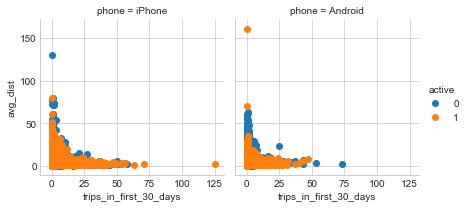

In [66]:
g = sns.FacetGrid(df, col="phone", hue="active")
g = (g.map(plt.scatter, 'trips_in_first_30_days', 'avg_dist').add_legend())


In [67]:
y = df['active']
X = df.drop('active', axis=1)

In [68]:
# Pandas get_dummies 
X_encoded_getdummies = pd.get_dummies(X, columns = categorical_cols, prefix_sep='_', drop_first=True) 

In [69]:
X = X_encoded_getdummies

In [70]:
X.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,city_King's Landing,city_Winterfell,phone_iPhone
0,4,4.7,1.10,15.4,1,46.2,3.67,5.0,1,0,1
1,0,5.0,1.00,0.0,0,50.0,8.26,5.0,0,0,0
2,3,4.3,1.00,0.0,0,100.0,0.77,5.0,0,0,1
3,9,4.6,1.14,20.0,1,80.0,2.36,4.9,1,0,1
4,14,4.4,1.19,11.8,0,82.4,3.13,4.9,0,1,0


In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   trips_in_first_30_days  50000 non-null  int64  
 1   avg_rating_of_driver    50000 non-null  float64
 2   avg_surge               50000 non-null  float64
 3   surge_pct               50000 non-null  float64
 4   ultimate_black_user     50000 non-null  int64  
 5   weekday_pct             50000 non-null  float64
 6   avg_dist                50000 non-null  float64
 7   avg_rating_by_driver    50000 non-null  float64
 8   city_King's Landing     50000 non-null  uint8  
 9   city_Winterfell         50000 non-null  uint8  
 10  phone_iPhone            50000 non-null  uint8  
dtypes: float64(6), int64(2), uint8(3)
memory usage: 3.2 MB


In [72]:
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].fillna(df['avg_rating_of_driver'].mean()) #4.6
df['avg_rating_of_driver'] = df['avg_rating_of_driver'].round(1)

df['avg_rating_by_driver'] = df['avg_rating_by_driver'].fillna(df['avg_rating_by_driver'].mean()) #4.8
df['avg_rating_by_driver'] = df['avg_rating_by_driver'].round(1)

In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   avg_rating_of_driver    50000 non-null  float64
 3   avg_surge               50000 non-null  float64
 4   phone                   50000 non-null  object 
 5   surge_pct               50000 non-null  float64
 6   ultimate_black_user     50000 non-null  int64  
 7   weekday_pct             50000 non-null  float64
 8   avg_dist                50000 non-null  float64
 9   avg_rating_by_driver    50000 non-null  float64
 10  active                  50000 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 4.2+ MB


In [74]:
df.head()

,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,4,4.7,1.10,iPhone,15.4,1,46.2,3.67,5.0,0
1,Astapor,0,5.0,1.00,Android,0.0,0,50.0,8.26,5.0,0
2,Astapor,3,4.3,1.00,iPhone,0.0,0,100.0,0.77,5.0,0
3,King's Landing,9,4.6,1.14,iPhone,20.0,1,80.0,2.36,4.9,1
4,Winterfell,14,4.4,1.19,Android,11.8,0,82.4,3.13,4.9,0


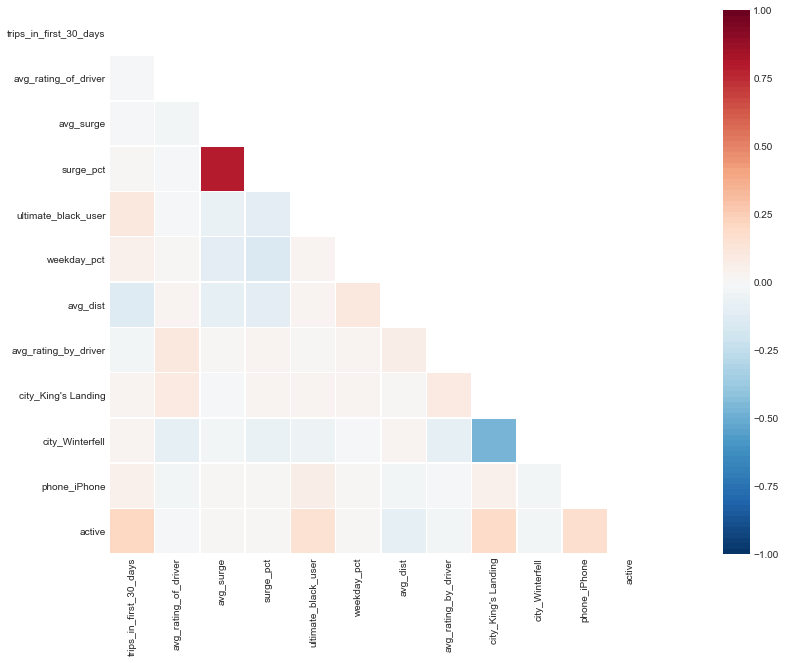

In [75]:
#Create a correlation plot of both datasets.

#corr_Xy = X.join(y)
corr_Xy = pd.concat([X,y], axis=1)

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(25,10)) 

#plt.subplot(1, 2, 1)
# Generate a mask for the upper triangle
mask = np.zeros_like(corr_Xy.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr_Xy.corr(), 
            vmin=-1, vmax=1, 
            square=True, 
            cmap=sns.color_palette("RdBu_r", 100), 
            mask=mask, 
            linewidths=.5)

Feature ranking:
1. feature 6 (0.31)
2. feature 5 (0.15)
3. feature 7 (0.10)
4. feature 3 (0.10)
5. feature 1 (0.09)
6. feature 0 (0.09)
7. feature 2 (0.07)
8. feature 8 (0.03)
9. feature 10 (0.02)
10. feature 4 (0.02)
11. feature 9 (0.01)


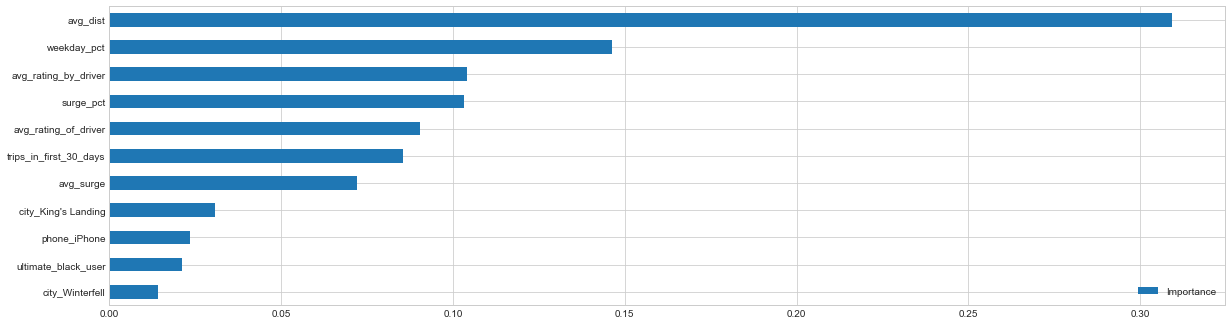

In [76]:
from sklearn.ensemble import RandomForestClassifier
# Using Random Forest to gain an insight on Feature Importance
rfclf = RandomForestClassifier()
rfclf.fit(X, y)

plt.style.use('seaborn-whitegrid')
importances = rfclf.feature_importances_

#####
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X.shape[1]):
    print("%d. feature %d (%.2f)" % (f + 1, indices[f], importances[indices[f]]))

#####
df_importances = pd.DataFrame(importances, index=X.columns, columns=["Importance"])
df_importances.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importances)/2));

In [77]:
df_copy = df.copy()

In [78]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, roc_curve, roc_auc_score
from sklearn.metrics import confusion_matrix

# set random_state SEED variable
SEED = 42

In [79]:
from sklearn import preprocessing

# create scaler
scaler = preprocessing.StandardScaler()

# transform numeric stats
df_copy[comb_numeric_cols] = scaler.fit_transform(df_copy[comb_numeric_cols])

df_copy.head()


,city,trips_in_first_30_days,avg_rating_of_driver,avg_surge,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,active
0,King's Landing,0.453984,0.174689,0.113506,iPhone,0.328202,1,-0.397131,-0.372650,0.497484,-0.568050
1,Astapor,-0.600689,0.705689,-0.336268,Android,-0.443394,0,-0.294653,0.431583,0.497484,-0.568050
2,Astapor,0.190316,-0.533312,-0.336268,iPhone,-0.443394,0,1.053741,-0.880771,0.497484,-0.568050
3,King's Landing,1.772325,-0.002312,0.293416,iPhone,0.558679,1,0.514383,-0.602181,0.273144,1.760407
4,Winterfell,3.090665,-0.356312,0.518303,Android,0.147829,0,0.579106,-0.467266,0.273144,-0.568050


In [80]:
# split features and target into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = SEED)

# training set breakdown
#train_success = y_train.sum()
train_total = len(y_train)
#train_percent = train_success / train_total
print('Training Set\nTotal:\t\t{}'.format(train_total))

# test set breakdown
#test_success = y_test.sum()
test_total = len(y_test)
#test_percent = test_success / test_total
print('Test Set\nTotal:\t\t{}'.format(test_total))

Training Set
Total:		35000
Test Set
Total:		15000


Class 0: 37802
Class 1: 12198
Proportion: 3.0 : 1


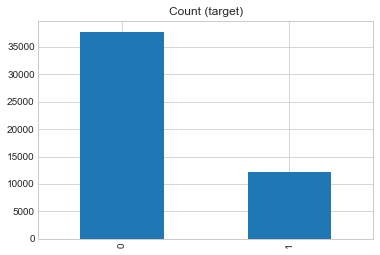

In [81]:
target_count = df.active.value_counts()
print('Class 0: {}'.format(target_count[0]))
print('Class 1: {}'.format(target_count[1]))
print('Proportion: {}'.format(round(target_count[0] / target_count[1]), 2), ': 1')

target_count.plot(kind='bar', title = 'Count (target)')

# #y : Train set
# target_count = y_train.value_counts()
# print('Class 0: {}'.format(target_count[0]))
# print('Class 1: {}'.format(target_count[1]))
# print('Proportion: {}'.format(round(target_count[0] / target_count[1]), 2), ': 1')
# target_count.plot(kind='bar', title = 'Count (target for Train set)')

# #y : Test set
# target_count = y_test.value_counts()
# print('Class 0: {}'.format(target_count[0]))
# print('Class 1: {}'.format(target_count[1]))
# print('Proportion: {}'.format(round(target_count[0] / target_count[1]), 2), ': 1')
# target_count.plot(kind='bar', title = 'Count (target for Test set)')

In [82]:
from sklearn import datasets, model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso, SGDClassifier
#tree
#import graphviz
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

# Grid and Random Search
import scipy.stats as st
from scipy.stats import randint as sp_randint
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

# Metrics
from sklearn.metrics import precision_recall_fscore_support, roc_curve, auc

import time
import datetime

In [83]:
# calculate the fpr and tpr for all thresholds of the classification
def plot_roc_curve(y_test, preds):
    fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
    roc_auc = metrics.auc(fpr, tpr)
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([-0.01, 1.01])
    plt.ylim([-0.01, 1.01])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [84]:
# Function that runs the requested algorithm and returns the accuracy metrics
def fit_ml_algo(algo, X_train, y_train, X_test, y_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs

In [85]:
# Logistic Regression - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {'penalty': ['l2', 'l1'], 
                         'class_weight': [None, 'balanced'],
                         'C': np.logspace(-20, 20, 10000), 
                         'intercept_scaling': np.logspace(-20, 20, 10000)}

# Run Randomized Search
n_iter_search = 10
lrc = LogisticRegression()
random_search = RandomizedSearchCV(lrc, 
                                   n_jobs=-1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 6.19 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.757 (std: 0.000)
Parameters: {'penalty': 'l2', 'intercept_scaling': 243522.2534400835, 'class_weight': None, 'C': 5.07540317536731e-06}

Model with rank: 2
Mean validation score: 0.681 (std: 0.005)
Parameters: {'penalty': 'l2', 'intercept_scaling': 2822572.2307376554, 'class_weight': 'balanced', 'C': 1565378.850798706}

Model with rank: 2
Mean validation score: 0.681 (std: 0.004)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.6070174848948915, 'class_weight': 'balanced', 'C': 1242.537289015407}

Model with rank: 4
Mean validation score: 0.680 (std: 0.003)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.6129494697108992e+16, 'class_weight': 'balanced', 'C': 3.465404822246198e+17}

Model with rank: 5
Mean validation score: 0.643 (std: 0.008)
Parameters: {'penalty': 'l2', 'intercept_scaling': 1.0423217498785373, 'class_weight': 'balanced', 'C': 1.09019390677681

In [86]:
# Logistic Regression
start_time = time.time()
train_pred_log, test_pred_log, acc_log, acc_cv_log, probs_log = fit_ml_algo(LogisticRegression(n_jobs = -1), 
                                                                 X_train, 
                                                                 y_train, 
                                                                 X_test, y_test,
                                                                 10)
log_time = (time.time() - start_time)
print("Accuracy: %s" % acc_log)
print("Accuracy CV 10-Fold: %s" % acc_cv_log)
print("Running Time: %s" % datetime.timedelta(seconds=log_time))

Accuracy: 76.85
Accuracy CV 10-Fold: 76.8
Running Time: 0:00:03.377940


In [87]:
print(metrics.classification_report(y_train, train_pred_log))

              precision    recall  f1-score   support

           0       0.78      0.96      0.86     26469
           1       0.58      0.18      0.28      8531

    accuracy                           0.77     35000
   macro avg       0.68      0.57      0.57     35000
weighted avg       0.73      0.77      0.72     35000



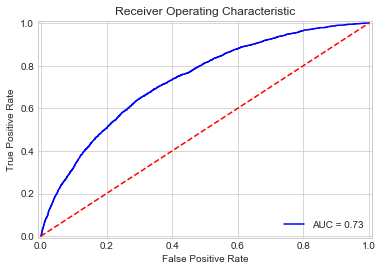

In [88]:
plot_roc_curve(y_test, probs_log)

In [89]:
# k-Nearest Neighbors
start_time = time.time()
train_pred_knn, test_pred_knn, acc_knn, acc_cv_knn, probs_knn = fit_ml_algo(KNeighborsClassifier(n_neighbors = 3,
                                                                                                 n_jobs = -1), 
                                                                                                 X_train, 
                                                                                                 y_train, 
                                                                                                 X_test, y_test,
                                                                                                 10)
knn_time = (time.time() - start_time)
print("Accuracy: %s" % acc_knn)
print("Accuracy CV 10-Fold: %s" % acc_cv_knn)
print("Running Time: %s" % datetime.timedelta(seconds=knn_time))

Accuracy: 75.15
Accuracy CV 10-Fold: 75.61
Running Time: 0:00:06.719579


In [90]:
print(metrics.classification_report(y_train, train_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84     26469
           1       0.50      0.40      0.45      8531

    accuracy                           0.76     35000
   macro avg       0.66      0.64      0.64     35000
weighted avg       0.74      0.76      0.75     35000



In [91]:
print(metrics.classification_report(y_test, test_pred_knn))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84     11333
           1       0.49      0.40      0.44      3667

    accuracy                           0.75     15000
   macro avg       0.65      0.63      0.64     15000
weighted avg       0.74      0.75      0.74     15000



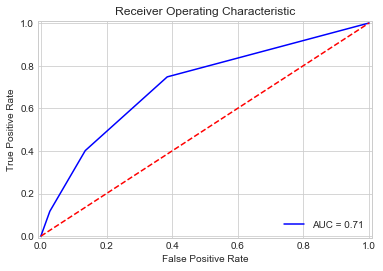

In [92]:
plot_roc_curve(y_test, probs_knn)

In [93]:
# Decision Tree Classifier
start_time = time.time()

def fit_ml_algo_clf(algo, X_train, y_train, X_test, y_test, cv):
    # One Pass
    model = algo.fit(X_train, y_train)
    test_pred = model.predict(X_test)
    if (isinstance(algo, (LogisticRegression, 
                          KNeighborsClassifier, 
                          GaussianNB, 
                          DecisionTreeClassifier, 
                          RandomForestClassifier,
                          GradientBoostingClassifier))):
        probs = model.predict_proba(X_test)[:,1]
    else:
        probs = "Not Available"
    acc = round(model.score(X_test, y_test) * 100, 2) 
    # CV 
    train_pred = model_selection.cross_val_predict(algo, 
                                                  X_train, 
                                                  y_train, 
                                                  cv=cv, 
                                                  n_jobs = -1)
    acc_cv = round(metrics.accuracy_score(y_train, train_pred) * 100, 2)
    return train_pred, test_pred, acc, acc_cv, probs, model

train_pred_dt, test_pred_dt, acc_dt, acc_cv_dt, probs_dt, clf_obj = fit_ml_algo_clf(DecisionTreeClassifier(), 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, y_test,
                                                             10)
dt_time = (time.time() - start_time)
print("Accuracy: %s" % acc_dt)
print("Accuracy CV 10-Fold: %s" % acc_cv_dt)
print("Running Time: %s" % datetime.timedelta(seconds=dt_time))

Accuracy: 72.31
Accuracy CV 10-Fold: 72.63
Running Time: 0:00:01.170269


In [94]:
print(metrics.classification_report(y_train, train_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     26469
           1       0.44      0.45      0.45      8531

    accuracy                           0.73     35000
   macro avg       0.63      0.63      0.63     35000
weighted avg       0.73      0.73      0.73     35000



In [95]:
print(metrics.classification_report(y_test, test_pred_dt))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82     11333
           1       0.43      0.43      0.43      3667

    accuracy                           0.72     15000
   macro avg       0.62      0.62      0.62     15000
weighted avg       0.72      0.72      0.72     15000



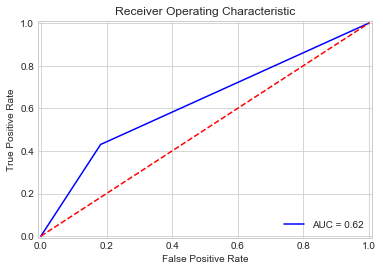

In [96]:
plot_roc_curve(y_test, probs_dt)

In [97]:
# Random Forest Classifier - Random Search for Hyperparameters

# Utility function to report best scores
def report(results, n_top=5):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")
            
# Specify parameters and distributions to sample from
param_dist = {"max_depth": [10, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 20),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

# Run Randomized Search
n_iter_search = 10
rfc = RandomForestClassifier(n_estimators=10)
random_search = RandomizedSearchCV(rfc, 
                                   n_jobs = -1, 
                                   param_distributions=param_dist, 
                                   n_iter=n_iter_search)

start = time.time()
random_search.fit(X_train, y_train)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time.time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 15.22 seconds for 10 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.796 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_depth': 10, 'max_features': 2, 'min_samples_leaf': 7, 'min_samples_split': 19}

Model with rank: 2
Mean validation score: 0.794 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 8, 'min_samples_split': 11}

Model with rank: 3
Mean validation score: 0.794 (std: 0.003)
Parameters: {'bootstrap': True, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 9, 'min_samples_leaf': 7, 'min_samples_split': 14}

Model with rank: 4
Mean validation score: 0.794 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 15}

Model with rank: 5
Mean validation score: 0.793 (std: 0.003)
Parameters: {'bootstrap': False, 'criterion': 'gini', 'ma

In [98]:
# Random Forest Classifier
start_time = time.time()
rfc = RandomForestClassifier(n_estimators=10, 
                             min_samples_leaf=2,
                             min_samples_split=17, 
                             criterion='gini', 
                             max_features=8)
train_pred_rf, test_pred_rf, acc_rf, acc_cv_rf, probs_rf = fit_ml_algo(rfc, 
                                                             X_train, 
                                                             y_train, 
                                                             X_test, y_test,
                                                             10)
rf_time = (time.time() - start_time)
print("Accuracy: %s" % acc_rf)
print("Accuracy CV 10-Fold: %s" % acc_cv_rf)
print("Running Time: %s" % datetime.timedelta(seconds=rf_time))

Accuracy: 78.31
Accuracy CV 10-Fold: 78.71
Running Time: 0:00:04.069703


In [99]:
print(metrics.classification_report(y_train, train_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.87     26469
           1       0.59      0.42      0.49      8531

    accuracy                           0.79     35000
   macro avg       0.71      0.66      0.68     35000
weighted avg       0.77      0.79      0.77     35000



In [100]:
print(metrics.classification_report(y_test, test_pred_rf))

              precision    recall  f1-score   support

           0       0.83      0.90      0.86     11333
           1       0.58      0.41      0.48      3667

    accuracy                           0.78     15000
   macro avg       0.70      0.66      0.67     15000
weighted avg       0.77      0.78      0.77     15000



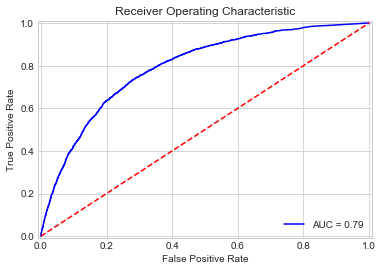

In [101]:
plot_roc_curve(y_test, probs_rf)

In [102]:
models = pd.DataFrame({
    'Model': ['KNN', 'Logistic Regression', 
              'Random Forest', 
              'Decision Tree'],
    'Accuracy': [
        acc_knn, 
        acc_log, 
        acc_rf, 
        acc_dt,
           ]})
models.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
2,Random Forest,78.31
1,Logistic Regression,76.85
0,KNN,75.15
3,Decision Tree,72.31
